In [2]:
import importlib
import labs
import augs
importlib.reload(augs)

importlib.reload(labs)
from labs import *
from augs import *
import random
random.seed(707)

# random argumentation 실험

In [15]:
image_paths = grep_files("/root/upstg_CV/data/train", exts=['jpg'])

0it [00:00, ?it/s]

In [16]:
test_img_paths = grep_files("/root/upstg_CV/deskewed-test", exts=['jpg'])
print(test_img_paths[0])

0it [00:00, ?it/s]

/root/upstg_CV/deskewed-test/13a57c95db160dfb.jpg


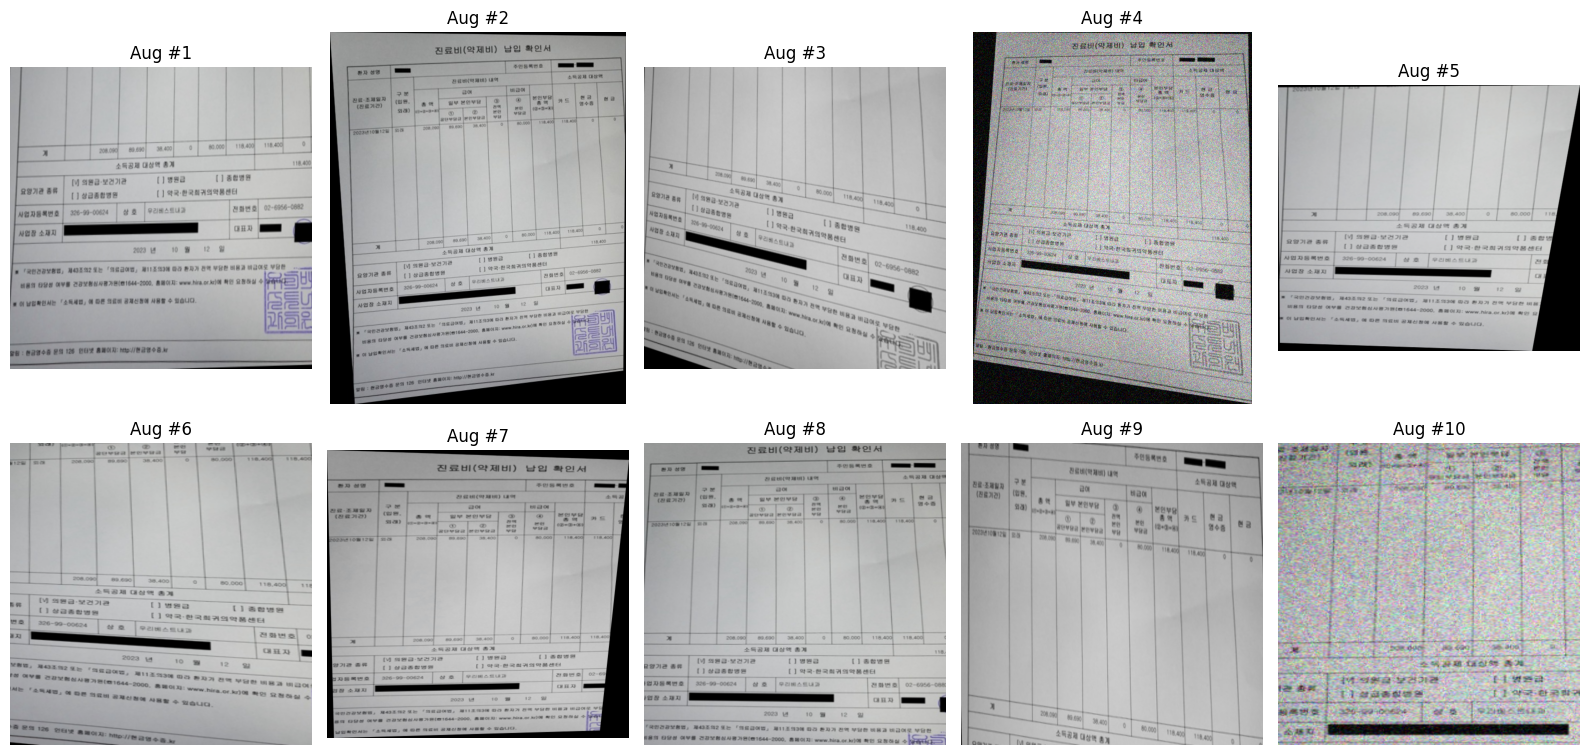

In [29]:
import augs
importlib.reload(augs)
from augs import *


# transform 세팅
tfs = Transforms(target_size=512)
augs = tfs.make()

# 수정된 함수: 한 이미지에 10번 augmentation 적용
def show_augmented_examples(idx=1, n=10, figsize=(15, 8)):
    p = image_paths[idx]
    img = cv2.imread(p)

    plt.figure(figsize=figsize)
    for i in range(n):
        aug_img = augs(image=img)['image']
        plt.subplot(2, (n + 1) // 2, i + 1)
        plt.imshow(cv2.cvtColor(aug_img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f"Aug #{i+1}")
    plt.tight_layout()
    plt.show()

# 사용 예시
show_augmented_examples(idx=30, n=10, figsize=(16, 8))


# image crop data 생성 코드

In [10]:
def crop_center_top(image, left_crop_ratio=0.2, right_crop_ratio=0.2, top_keep_ratio=1/3):
    """
    이미지를 상단 중앙 부분만 남기도록 자르는 함수
    
    Args:
        image: PIL Image 또는 numpy array
        left_crop_ratio: 왼쪽에서 자를 비율 (0.2 = 20%)
        right_crop_ratio: 오른쪽에서 자를 비율 (0.2 = 20%)
        top_keep_ratio: 상단에서 유지할 비율 (1/3 = 33.3%)
    
    Returns:
        cropped_image: 자른 이미지
    """
    if isinstance(image, np.ndarray):
        height, width = image.shape[:2]
        
        # 좌우 20%씩 자르기
        left_cut = int(width * left_crop_ratio)
        right_cut = int(width * (1 - right_crop_ratio))
        
        # 상단 1/3만 남기기
        top_cut = 0
        bottom_cut = int(height * top_keep_ratio)
        
        cropped = image[top_cut:bottom_cut, left_cut:right_cut]
        
    else:  # PIL Image
        width, height = image.size
        
        # 좌우 20%씩 자르기
        left_cut = int(width * left_crop_ratio)
        right_cut = int(width * (1 - right_crop_ratio))
        
        # 상단 1/3만 남기기
        top_cut = 0
        bottom_cut = int(height * top_keep_ratio)
        
        cropped = image.crop((left_cut, top_cut, right_cut, bottom_cut))
    
    return cropped

def process_and_save_cropped_images(image_paths, output_dir):
    """
    모든 이미지를 크롭하고 동일한 파일명으로 저장하는 함수
    
    Args:
        image_paths: 이미지 경로 리스트
        output_dir: 저장할 디렉토리
    """
    
    # 출력 디렉토리 생성
    os.makedirs(output_dir, exist_ok=True)
    
    print(f"총 {len(image_paths)}개의 이미지를 처리합니다...")
    
    processed_count = 0
    
    for img_path in tqdm(image_paths, desc="이미지 크롭 및 저장"):
        try:
            # 이미지 로드
            image = Image.open(img_path)
            
            # 이미지 크롭
            cropped_image = crop_center_top(image)
            
            # 동일한 파일명으로 새로운 경로 생성
            original_filename = os.path.basename(img_path)
            new_path = os.path.join(output_dir, original_filename)
            
            # 크롭된 이미지 저장
            cropped_image.save(new_path, quality=95)
            processed_count += 1
            
        except Exception as e:
            print(f"Error processing {img_path}: {str(e)}")
            continue
    
    print(f"총 {processed_count}개의 이미지가 성공적으로 처리되었습니다.")
    print(f"크롭된 이미지들이 저장된 경로: {output_dir}")

# 메인 실행 코드
if __name__ == "__main__":
    # 경로 설정
    image_paths = grep_files("/root/upstg_CV/data/train", exts=['jpg'])
    
    # 출력 디렉토리 설정
    output_dir = "/root/upstg_CV/data/train_cropped"
    
    # 이미지 처리 및 저장
    process_and_save_cropped_images(image_paths, output_dir)
    
    print("처리 완료!")

0it [00:00, ?it/s]

총 1569개의 이미지를 처리합니다...


이미지 크롭 및 저장: 100%|██████████| 1569/1569 [00:02<00:00, 568.15it/s]

총 1569개의 이미지가 성공적으로 처리되었습니다.
크롭된 이미지들이 저장된 경로: /root/upstg_CV/data/train_cropped
처리 완료!


In [13]:
def crop_center_top(image, left_crop_ratio=0.2, right_crop_ratio=0.2, top_keep_ratio=1/3):
    """
    이미지를 상단 중앙 부분만 남기도록 자르는 함수
    
    Args:
        image: PIL Image 또는 numpy array
        left_crop_ratio: 왼쪽에서 자를 비율 (0.2 = 20%)
        right_crop_ratio: 오른쪽에서 자를 비율 (0.2 = 20%)
        top_keep_ratio: 상단에서 유지할 비율 (1/3 = 33.3%)
    
    Returns:
        cropped_image: 자른 이미지
    """
    if isinstance(image, np.ndarray):
        height, width = image.shape[:2]
        
        # 좌우 20%씩 자르기
        left_cut = int(width * left_crop_ratio)
        right_cut = int(width * (1 - right_crop_ratio))
        
        # 상단 1/3만 남기기
        top_cut = 0
        bottom_cut = int(height * top_keep_ratio)
        
        cropped = image[top_cut:bottom_cut, left_cut:right_cut]
        
    else:  # PIL Image
        width, height = image.size
        
        # 좌우 20%씩 자르기
        left_cut = int(width * left_crop_ratio)
        right_cut = int(width * (1 - right_crop_ratio))
        
        # 상단 1/3만 남기기
        top_cut = 0
        bottom_cut = int(height * top_keep_ratio)
        
        cropped = image.crop((left_cut, top_cut, right_cut, bottom_cut))
    
    return cropped

def process_and_save_cropped_images(image_paths, output_dir):
    """
    모든 이미지를 크롭하고 동일한 파일명으로 저장하는 함수
    
    Args:
        image_paths: 이미지 경로 리스트
        output_dir: 저장할 디렉토리
    """
    
    # 출력 디렉토리 생성
    os.makedirs(output_dir, exist_ok=True)
    
    print(f"총 {len(image_paths)}개의 이미지를 처리합니다...")
    
    processed_count = 0
    
    for img_path in tqdm(image_paths, desc="이미지 크롭 및 저장"):
        try:
            # 이미지 로드
            image = Image.open(img_path)
            
            # 이미지 크롭
            cropped_image = crop_center_top(image)
            
            # 동일한 파일명으로 새로운 경로 생성
            original_filename = os.path.basename(img_path)
            new_path = os.path.join(output_dir, original_filename)
            
            # 크롭된 이미지 저장
            cropped_image.save(new_path, quality=95)
            processed_count += 1
            
        except Exception as e:
            print(f"Error processing {img_path}: {str(e)}")
            continue
    
    print(f"총 {processed_count}개의 이미지가 성공적으로 처리되었습니다.")
    print(f"크롭된 이미지들이 저장된 경로: {output_dir}")
    

# 메인 실행 코드
if __name__ == "__main__":
    # 경로 설정
    image_paths = grep_files("/root/upstg_CV/deskewed-test", exts=['jpg'])
    
    # 출력 디렉토리 설정
    output_dir = "/root/upstg_CV/data/test_cropped"
    
    # 이미지 처리 및 저장
    process_and_save_cropped_images(image_paths, output_dir)
    
    print("처리 완료!")

0it [00:00, ?it/s]

총 3140개의 이미지를 처리합니다...


이미지 크롭 및 저장: 100%|██████████| 3140/3140 [00:09<00:00, 346.94it/s]

총 3140개의 이미지가 성공적으로 처리되었습니다.
크롭된 이미지들이 저장된 경로: /root/upstg_CV/data/test_cropped
처리 완료!
